# Multi Asset Monte Carlo Simulation, using S&P 500 as an example

In [1]:
# Import libraries and dependencies
import pandas as pd
from pathlib import Path
import numpy as np
import datetime as dt
%matplotlib inline

### Read Price Files

In [2]:
# Read file and index on date

# S&P 500
sp500_df = pd.read_csv(Path('HistoricalQuotes_gspc.csv'), index_col=0, infer_datetime_format=True, parse_dates=True)

# Dow Jones
dow_df = pd.read_csv(Path('DowJones.csv'), index_col=0, infer_datetime_format=True, parse_dates=True)

# DBC
dbc_df = pd.read_csv(Path('Invesco DB Commodity Index Tracking Fund.csv'), index_col=0, infer_datetime_format=True, parse_dates=True)

# PREIX
preix_df = pd.read_csv(Path('PREIX_TRowePrice.csv'), index_col=0, infer_datetime_format=True, parse_dates=True)

# SCHH
schh_df = pd.read_csv(Path('SCHH_REIT.csv'), index_col=0, infer_datetime_format=True, parse_dates=True)

# VCSH
vcsh_df = pd.read_csv(Path('VCSH_vanguard_st_corp_bond_index_etf.csv'), index_col=0, infer_datetime_format=True, parse_dates=True)

# VLGSX
vlgsx_df = pd.read_csv(Path('VLGSX.csv'), index_col=0, infer_datetime_format=True, parse_dates=True)

In [3]:
sp500_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-20,3223.330078,3225.649902,3216.030029,3221.219971,3221.219971,6454270000
2019-12-23,3226.050049,3227.780029,3222.300049,3224.010010,3224.010010,3060610000
2019-12-24,3225.449951,3226.429932,3220.510010,3223.379883,3223.379883,1296540000
2019-12-26,3227.199951,3240.080078,3227.199951,3239.909912,3239.909912,2160680000
2019-12-27,3247.229980,3247.929932,3234.370117,3240.020020,3240.020020,2428670000


In [4]:
dow_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-20,28608.640625,28608.640625,28445.599609,28455.089844,28455.089844,603780000
2019-12-23,28491.779297,28582.490234,28491.779297,28551.529297,28551.529297,223530000
2019-12-24,28572.570313,28576.800781,28503.210938,28515.449219,28515.449219,86150000
2019-12-26,28539.460938,28624.099609,28535.150391,28621.390625,28621.390625,155970000
2019-12-27,28675.339844,28701.660156,28608.980469,28645.259766,28645.259766,182280000


In [5]:
dbc_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-20,16.100000,16.150000,16.049999,16.110001,15.856000,1043100
2019-12-23,15.820000,15.870000,15.790000,15.860000,15.860000,837500
2019-12-24,15.860000,15.950000,15.860000,15.930000,15.930000,466200
2019-12-26,15.970000,16.049999,15.970000,16.049999,16.049999,679200
2019-12-27,16.059999,16.090000,16.020000,16.080000,16.080000,1250000


In [6]:
preix_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-20,85.540001,85.540001,85.540001,85.540001,83.639160,0
2019-12-23,85.620003,85.620003,85.620003,85.620003,83.717392,0
2019-12-24,85.610001,85.610001,85.610001,85.610001,83.707611,0
2019-12-26,86.050003,86.050003,86.050003,86.050003,84.137825,0
2019-12-27,86.059998,86.059998,86.059998,86.059998,84.147598,0


In [7]:
schh_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-20,45.110001,45.490002,45.110001,45.330002,44.100784,622200
2019-12-23,45.380001,45.480000,45.000000,45.080002,43.857567,630600
2019-12-24,45.139999,45.279999,45.029999,45.180000,43.954849,333300
2019-12-26,45.209999,45.419998,45.180000,45.419998,44.188343,395700
2019-12-27,45.509998,45.610001,45.389999,45.570000,44.334278,468000


In [8]:
vcsh_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-20,80.989998,81.040001,80.980003,81.019997,79.102394,2349400
2019-12-23,80.849998,80.849998,80.769997,80.769997,79.056396,3100900
2019-12-24,80.779999,80.849998,80.779999,80.849998,79.134705,629000
2019-12-26,80.889999,80.889999,80.839996,80.870003,79.154274,784500
2019-12-27,81.000000,81.010002,80.940002,80.980003,79.261940,1438600


In [9]:
vlgsx_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-20,28.170000,28.170000,28.170000,28.170000,27.709385,0
2019-12-23,28.120001,28.120001,28.120001,28.120001,27.660202,0
2019-12-24,28.200001,28.200001,28.200001,28.200001,27.738894,0
2019-12-26,28.270000,28.270000,28.270000,28.270000,27.807753,0
2019-12-27,28.309999,28.309999,28.309999,28.309999,27.847094,0


In [10]:
# Strip the dataframes of the non-essential columns, keep Close only
sp500_df = sp500_df[['Close']]
dow_df = dow_df[['Close']]
dbc_df = dbc_df[['Close']]
preix_df = preix_df[['Close']]
schh_df = schh_df[['Close']]
vcsh_df = vcsh_df[['Close']]
vlgsx_df = vlgsx_df[['Close']]

In [11]:
sp500_df.head()

,Close
Date,
2019-12-20,3221.219971
2019-12-23,3224.010010
2019-12-24,3223.379883
2019-12-26,3239.909912
2019-12-27,3240.020020


In [12]:
dow_df.head()

,Close
Date,
2019-12-20,28455.089844
2019-12-23,28551.529297
2019-12-24,28515.449219
2019-12-26,28621.390625
2019-12-27,28645.259766


In [13]:
dbc_df.head()

,Close
Date,
2019-12-20,16.110001
2019-12-23,15.860000
2019-12-24,15.930000
2019-12-26,16.049999
2019-12-27,16.080000


In [14]:
preix_df.head()

,Close
Date,
2019-12-20,85.540001
2019-12-23,85.620003
2019-12-24,85.610001
2019-12-26,86.050003
2019-12-27,86.059998


In [15]:
schh_df.head()

,Close
Date,
2019-12-20,45.330002
2019-12-23,45.080002
2019-12-24,45.180000
2019-12-26,45.419998
2019-12-27,45.570000


In [16]:
vcsh_df.head()

,Close
Date,
2019-12-20,81.019997
2019-12-23,80.769997
2019-12-24,80.849998
2019-12-26,80.870003
2019-12-27,80.980003


In [17]:
vlgsx_df.head()

,Close
Date,
2019-12-20,28.170000
2019-12-23,28.120001
2019-12-24,28.200001
2019-12-26,28.270000
2019-12-27,28.309999


In [18]:
# Rename Close columns to respective indices
sp500_df.rename(columns = {'Close': 'S&P500'}, inplace=True)
dow_df.rename(columns = {'Close': 'Dow'}, inplace=True)
dbc_df.rename(columns = {'Close': 'DBC'}, inplace=True)
preix_df.rename(columns = {'Close': 'PREIX'}, inplace=True)
schh_df.rename(columns = {'Close': 'SCHH'}, inplace=True)
vcsh_df.rename(columns = {'Close': 'VCSH'}, inplace=True)
vlgsx_df.rename(columns = {'Close': 'VLGSX'}, inplace=True)

In [19]:
sp500_df.head()

,S&P500
Date,
2019-12-20,3221.219971
2019-12-23,3224.010010
2019-12-24,3223.379883
2019-12-26,3239.909912
2019-12-27,3240.020020


In [20]:
dow_df.head()

,Dow
Date,
2019-12-20,28455.089844
2019-12-23,28551.529297
2019-12-24,28515.449219
2019-12-26,28621.390625
2019-12-27,28645.259766


In [21]:
dbc_df.head()

,DBC
Date,
2019-12-20,16.110001
2019-12-23,15.860000
2019-12-24,15.930000
2019-12-26,16.049999
2019-12-27,16.080000


In [22]:
preix_df.head()

,PREIX
Date,
2019-12-20,85.540001
2019-12-23,85.620003
2019-12-24,85.610001
2019-12-26,86.050003
2019-12-27,86.059998


In [23]:
schh_df.head()

,SCHH
Date,
2019-12-20,45.330002
2019-12-23,45.080002
2019-12-24,45.180000
2019-12-26,45.419998
2019-12-27,45.570000


In [24]:
vlgsx_df.head()

,VLGSX
Date,
2019-12-20,28.170000
2019-12-23,28.120001
2019-12-24,28.200001
2019-12-26,28.270000
2019-12-27,28.309999


In [25]:
# Concatenate into one portfolio

In [26]:
portfolio = pd.concat([dow_df, sp500_df, dbc_df, preix_df, schh_df, vcsh_df, vlgsx_df], axis=1, join='inner')

In [27]:
portfolio.head()

,Dow,S&P500,DBC,PREIX,SCHH,VCSH,VLGSX
Date,,,,,,,
2019-12-20,28455.089844,3221.219971,16.110001,85.540001,45.330002,81.019997,28.170000
2019-12-23,28551.529297,3224.010010,15.860000,85.620003,45.080002,80.769997,28.120001
2019-12-24,28515.449219,3223.379883,15.930000,85.610001,45.180000,80.849998,28.200001
2019-12-26,28621.390625,3239.909912,16.049999,86.050003,45.419998,80.870003,28.270000
2019-12-27,28645.259766,3240.020020,16.080000,86.059998,45.570000,80.980003,28.309999


In [28]:
portfolio.tail()

,Dow,S&P500,DBC,PREIX,SCHH,VCSH,VLGSX
Date,,,,,,,
2020-12-14,29861.550781,3647.489990,14.28,96.250000,36.990002,83.050003,32.459999
2020-12-15,30199.310547,3694.620117,14.39,97.500000,37.759998,83.110001,32.360001
2020-12-16,30154.539063,3701.169922,14.47,97.669998,37.790001,83.129997,32.279999
2020-12-17,30303.369141,3722.479980,14.64,98.239998,38.150002,83.169998,32.189999
2020-12-18,30179.050781,3709.409912,14.69,97.900002,37.419998,83.169998,32.099998


In [29]:
#for time, asset in portfolio.iterrows():
 #   print(time, asset)

In [30]:
# Calculate daily returns
portfolio_returns = portfolio.pct_change()
portfolio_returns.head()

,Dow,S&P500,DBC,PREIX,SCHH,VCSH,VLGSX
Date,,,,,,,
2019-12-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-23,0.003389,0.000866,-0.015518,0.000935,-0.005515,-0.003086,-0.001775
2019-12-24,-0.001264,-0.000195,0.004414,-0.000117,0.002218,0.000990,0.002845
2019-12-26,0.003715,0.005128,0.007533,0.005140,0.005312,0.000247,0.002482
2019-12-27,0.000834,0.000034,0.001869,0.000116,0.003303,0.001360,0.001415


In [31]:
# Drop NAs
portfolio_returns = portfolio_returns.dropna()
portfolio_returns.head()

,Dow,S&P500,DBC,PREIX,SCHH,VCSH,VLGSX
Date,,,,,,,
2019-12-23,0.003389,0.000866,-0.015518,0.000935,-0.005515,-0.003086,-0.001775
2019-12-24,-0.001264,-0.000195,0.004414,-0.000117,0.002218,0.000990,0.002845
2019-12-26,0.003715,0.005128,0.007533,0.005140,0.005312,0.000247,0.002482
2019-12-27,0.000834,0.000034,0.001869,0.000116,0.003303,0.001360,0.001415
2019-12-30,-0.006393,-0.005781,-0.001866,-0.005694,0.001317,0.000741,-0.003179


In [32]:
portfolio_returns.tail()

,Dow,S&P500,DBC,PREIX,SCHH,VCSH,VLGSX
Date,,,,,,,
2020-12-14,-0.006151,-0.004359,0.002809,-0.004242,-0.004575,-0.000120,-0.002765
2020-12-15,0.011311,0.012921,0.007703,0.012987,0.020816,0.000722,-0.003081
2020-12-16,-0.001483,0.001773,0.005559,0.001744,0.000795,0.000241,-0.002472
2020-12-17,0.004936,0.005758,0.011748,0.005836,0.009526,0.000481,-0.002788
2020-12-18,-0.004102,-0.003511,0.003415,-0.003461,-0.019135,0.000000,-0.002796


In [37]:
# Average daily return
# .[['Dow', 'S&P500', 'DBC', 'PREIX', 'SCHH', 'VCSH', 'VLGSX']]
portfolio_avg_daily_return = portfolio_returns[['Dow', 'S&P500', 'DBC', 'PREIX', 'SCHH', 'VCSH', 'VLGSX']].mean()
portfolio_avg_daily_return

Dow       0.000506
S&P500    0.000801
DBC      -0.000273
PREIX     0.000778
SCHH     -0.000381
VCSH      0.000117
VLGSX     0.000595
dtype: float64

In [73]:
dow_returns = portfolio_avg_daily_return.Dow
sp500_returns = portfolio_avg_daily_return['S&P500']
dbc_returns = portfolio_avg_daily_return.DBC
preix_returns = portfolio_avg_daily_return.PREIX
schh_returns = portfolio_avg_daily_return.SCHH
vcsh_returns = portfolio_avg_daily_return.VCSH
vlgsx_returns = portfolio_avg_daily_return.VLGSX


print(dow_returns)
print(sp500_returns)
print(dbc_returns)
print(preix_returns)
print(schh_returns)
print(vcsh_returns)
print(vlgsx_returns)

0.000505965581007818
0.0008006280912802364
-0.0002730822612932791
0.000777507683012136
-0.0003813393523458818
0.00011690732397972472
0.0005946840816659727


In [39]:
# Standard deviation
portfolio_stdev = portfolio_returns.describe()

In [40]:
portfolio_stdev

,Dow,S&P500,DBC,PREIX,SCHH,VCSH,VLGSX
count,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000
mean,0.000506,0.000801,-0.000273,0.000778,-0.000381,0.000117,0.000595
std,0.023241,0.021769,0.013683,0.021834,0.027319,0.005010,0.012231
min,-0.129265,-0.119841,-0.077844,-0.119779,-0.181794,-0.034320,-0.058630
25%,-0.006272,-0.006249,-0.007979,-0.006337,-0.012468,-0.000362,-0.005370
50%,0.001418,0.002397,0.001480,0.002547,0.001067,0.000242,0.000000
75%,0.009304,0.010049,0.007864,0.010117,0.010857,0.000741,0.006451
max,0.113650,0.093828,0.031656,0.094169,0.086662,0.035083,0.066733


In [42]:
portfolio_returns.std()

Dow       0.023241
S&P500    0.021769
DBC       0.013683
PREIX     0.021834
SCHH      0.027319
VCSH      0.005010
VLGSX     0.012231
dtype: float64

In [74]:
dow_std = portfolio_returns.Dow.std()
sp500_std = portfolio_returns['S&P500'].std()
dbc_std = portfolio_returns.DBC.std()
preix_std = portfolio_returns.PREIX.std()
schh_std = portfolio_returns.SCHH.std()
vcsh_std = portfolio_returns.VCSH.std()
vlgsx_std = portfolio_returns.VLGSX.std()


print(dow_std)
print(sp500_std)
print(dbc_std)
print(preix_std)
print(schh_std)
print(vcsh_std)
print(vlgsx_std)

0.023241269777673
0.021769329271760198
0.013683093045786913
0.021834275575792355
0.027319150561085102
0.005010045924397159
0.012230617404429142


In [75]:
portfolio['Dow'][-1]

30179.050781

### Run the Monte Carlo Simulation and commit results to a DataFrame

In [76]:
# Set number of simulations and trading days
num_simulations = 1000
num_trading_days = 252

# Set last closing prices of `JNJ` and `MU`
dow_last_price = portfolio['Dow'][-1]
sp500_last_price = portfolio['S&P500'][-1]
dbc_last_price = portfolio['DBC'][-1]
preix_last_price = portfolio['PREIX'][-1]
schh_last_price = portfolio['SCHH'][-1]
vcsh_last_price = portfolio['VCSH'][-1]
vlgsx_last_price = portfolio['VLGSX'][-1]

# Initialize empty DataFrame to hold simulated prices for each simulation
simulated_price_df = pd.DataFrame()
portfolio_cumulative_returns = pd.DataFrame()

# Run the simulation of projecting stock prices for the next trading year, `1000` times
for n in range(num_simulations):

    # Initialize the simulated prices list with the last closing price of `JNJ` and `MU`
    simulated_dow_prices = [dow_last_price]
    simulated_sp500_prices = [sp500_last_price]
    simulated_dbc_prices = [dbc_last_price]
    simulated_preix_prices = [preix_last_price]
    simulated_schh_prices = [schh_last_price]
    simulated_vcsh_prices = [vcsh_last_price]
    simulated_vlgsx_prices = [vlgsx_last_price]
    
    # Simulate the returns for 252 days
    for i in range(num_trading_days):
        
        # Calculate the simulated price using the last price within the list
        simulated_dow_price = simulated_dow_prices[-1] * (1 + np.random.normal(dow_returns, dow_std))
        simulated_sp500_price = simulated_sp500_prices[-1] * (1 + np.random.normal(sp500_returns, sp500_std))
        simulated_dbc_price = simulated_dbc_prices[-1] * (1 + np.random.normal(dbc_returns, dbc_std))
        simulated_preix_price = simulated_preix_prices[-1] * (1 + np.random.normal(preix_returns, preix_std))
        simulated_schh_price = simulated_schh_prices[-1] * (1 + np.random.normal(schh_returns, schh_std))
        simulated_vcsh_price = simulated_vcsh_prices[-1] * (1 + np.random.normal(vcsh_returns, vcsh_std))
        simulated_vlgsx_price = simulated_vlgsx_prices[-1] * (1 + np.random.normal(vlgsx_returns, vlgsx_std))
                
        # Append the simulated price to the list
        simulated_dow_prices.append(simulated_dow_price)
        simulated_sp500_prices.append(simulated_sp500_price)
        simulated_dbc_prices.append(simulated_dbc_price)
        simulated_preix_prices.append(simulated_preix_price)
        simulated_schh_prices.append(simulated_schh_price)
        simulated_vcsh_prices.append(simulated_vcsh_price)
        simulated_vlgsx_prices.append(simulated_vlgsx_price)
    
    
    # Append a simulated prices of each simulation to DataFrame
    simulated_price_df["Dow"] = pd.Series(simulated_dow_prices)
    simulated_price_df["S&P500"] = pd.Series(simulated_sp500_prices)
    simulated_price_df["DBC"] = pd.Series(simulated_dbc_prices)
    simulated_price_df["PREIX"] = pd.Series(simulated_preix_prices)
    simulated_price_df["SCHH"] = pd.Series(simulated_schh_prices)
    simulated_price_df["VCSH"] = pd.Series(simulated_vcsh_prices)
    simulated_price_df["VLGSX"] = pd.Series(simulated_vlgsx_prices)
        
    # Calculate the daily returns of simulated prices
    simulated_daily_returns = simulated_price_df.pct_change()
    
    # Set the portfolio weights (60% JNJ; 40% MU)
    weights = [0.25, 0.25, 0.1, 0.1, 0.1, 0.1, 0.1]

    # Use the `dot` function with the weights to multiply weights with each column's simulated daily returns
    portfolio_daily_returns = simulated_daily_returns.dot(weights)
    
    # Calculate the normalized, cumulative return series
    portfolio_cumulative_returns[n] = (1 + portfolio_daily_returns.fillna(0)).cumprod()

# Print records from the DataFrame
portfolio_cumulative_returns.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005511,0.995297,1.002668,0.987683,0.998889,0.995080,0.998370,0.995299,1.010700,0.996789,...,1.008140,0.997533,0.979546,0.995549,0.991243,0.994885,1.010651,0.998664,1.002712,1.000081
2,1.017290,0.987205,1.005423,0.993550,0.998444,0.987228,0.999145,1.009865,1.015841,1.011515,...,1.007895,1.005377,0.962563,1.006753,0.989677,1.016099,0.999669,1.003422,1.001414,0.992272
3,1.036487,0.982881,1.006903,0.980494,0.997381,0.984079,1.005207,1.019503,1.029869,1.008439,...,0.995262,1.003219,0.965965,1.009593,0.996738,1.022793,0.989301,1.008135,0.998050,0.992491
4,1.033850,0.989917,1.016086,0.987671,0.992519,0.980660,1.003900,1.036507,1.029705,1.007612,...,0.993603,1.021042,0.976114,1.006303,0.991816,1.007680,0.998098,1.007261,0.993502,0.991076


### Plot the Multiple Simulations of Potential Cumulative Portfolio Returns over the Next Year (252 Trading Days)

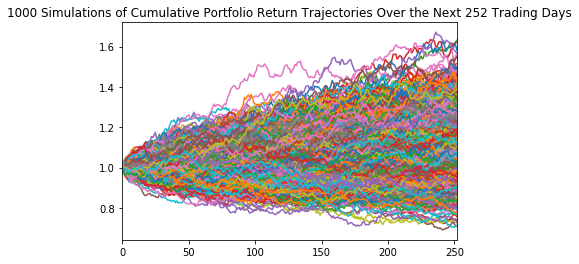

In [81]:
# Use the `plot` function to plot `1000` simulations of the potential trajectories of the portfolio based on 252 trading days
plot_title = f"{n+1} Simulations of Cumulative Portfolio Return Trajectories Over the Next 252 Trading Days"
portfolio_cumulative_returns.plot(legend=None, title=plot_title)